In [2]:
import pandas as pd
import numpy as np

In [29]:
dataset=pd.read_csv(r'C:\Users\poorn\OneDrive\Documents\ExcelR\Asssignment\Assign_5\Toyota_Corolla.csv', encoding='latin1')
dataset.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [44]:
columns_to_drop = ['Id','Model','Mfg_Month', 'Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette','Tow_Bar']
dataset.drop(columns_to_drop, axis = 1, inplace= True)


In [61]:
dataset=dataset.rename({'Age_08_04':'Age_Months', 'cc':'CC', 'Quarterly_Tax':'QT'}, axis=1)
dataset.head()

,Price,Age_Months,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [53]:
dataset.shape

(1436, 9)

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [55]:
dataset.isnull().any().any()

False

In [65]:
dataset[dataset.duplicated()]

,Price,Age_Months,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [73]:
dataset=dataset.drop_duplicates().reset_index(drop=True)
dataset

,Price,Age_Months,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [72]:
dataset.describe()

,Price,Age_Months,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


Correlation

In [74]:
dataset.corr()

,Price,Age_Months,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_Months,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


Data Visualization

In [78]:
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

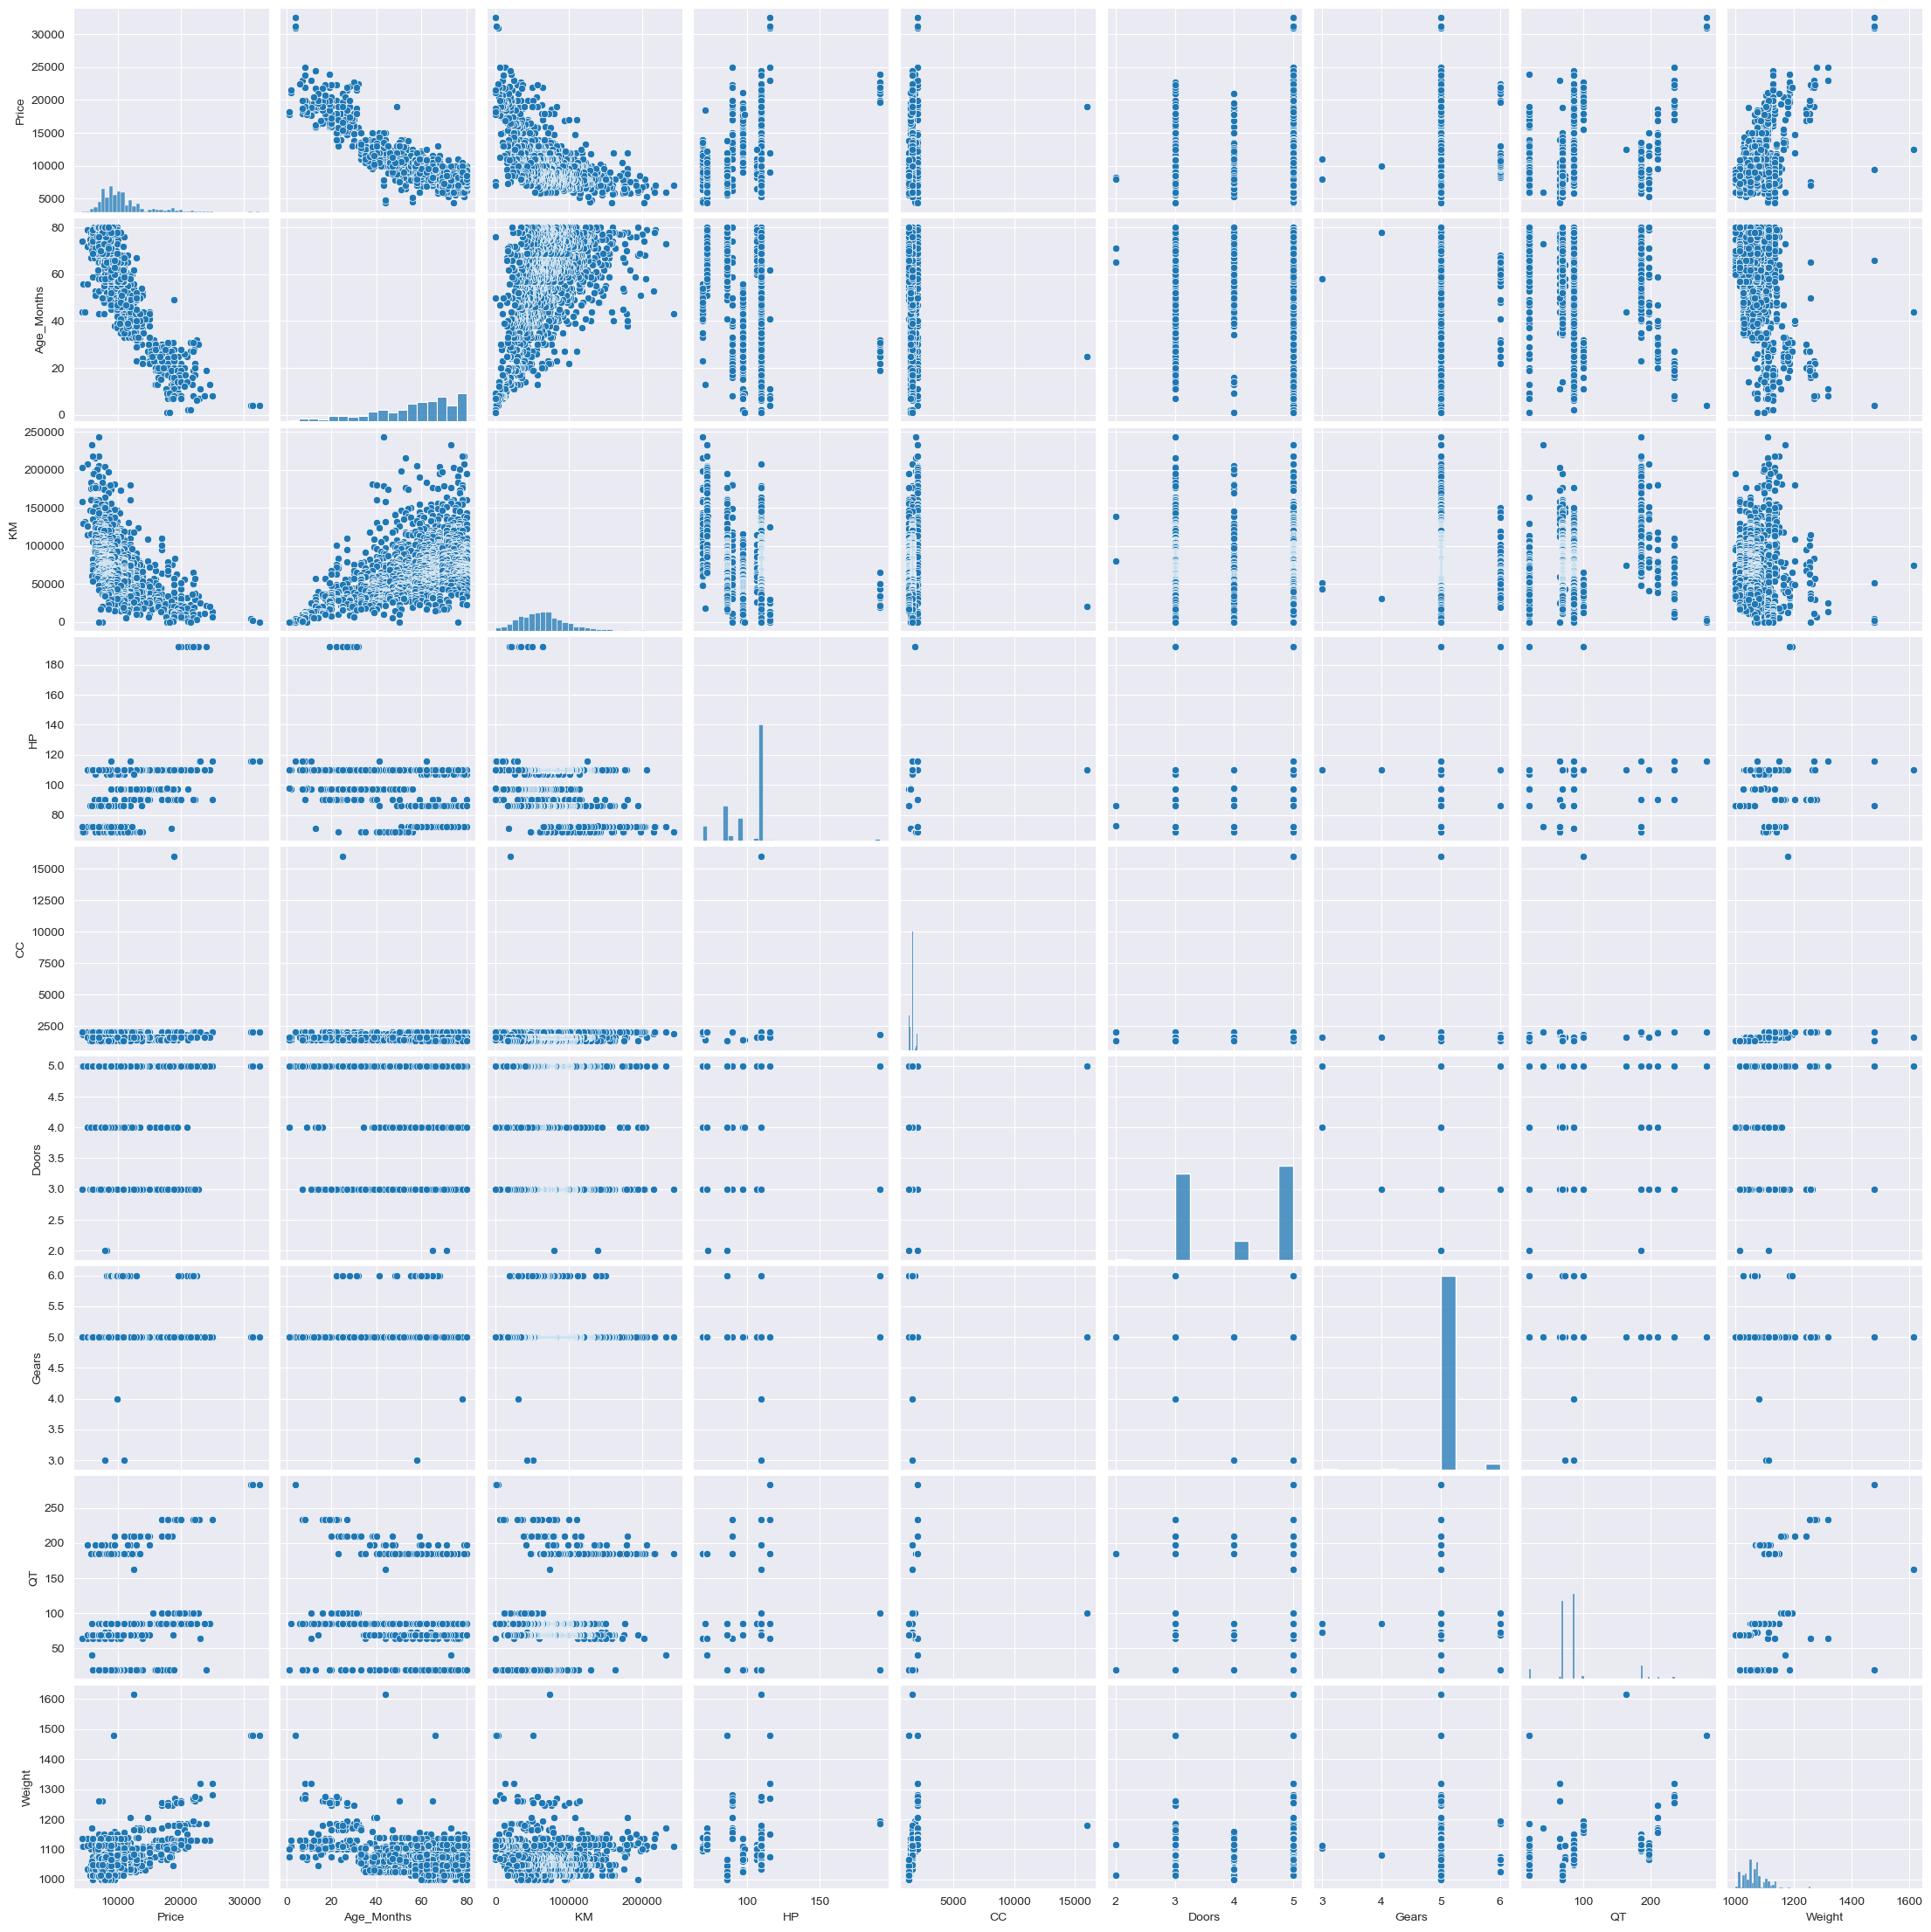

In [81]:
sns.pairplot(dataset)

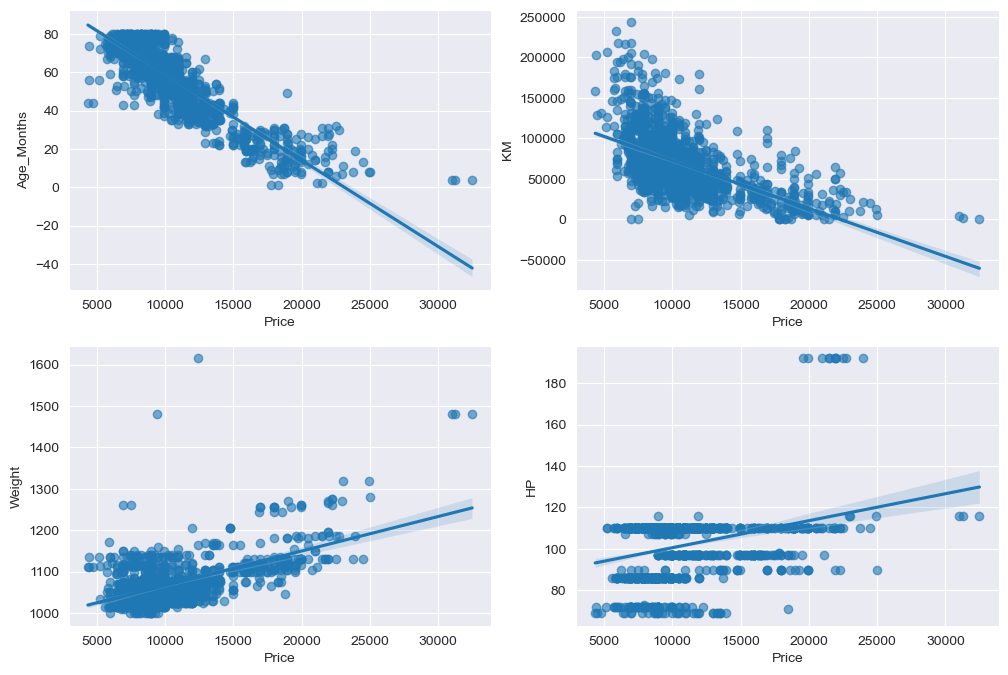

In [84]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(x = 'Price', y = 'Age_Months', data = dataset, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.regplot(x = 'Price', y = 'KM', data = dataset, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.regplot(x = 'Price', y = 'Weight', data = dataset, scatter_kws={'alpha':0.6}, ax = axes[1,0])
sns.regplot(x = 'Price', y = 'HP', data = dataset, scatter_kws={'alpha':0.6}, ax = axes[1,1])
plt.show()

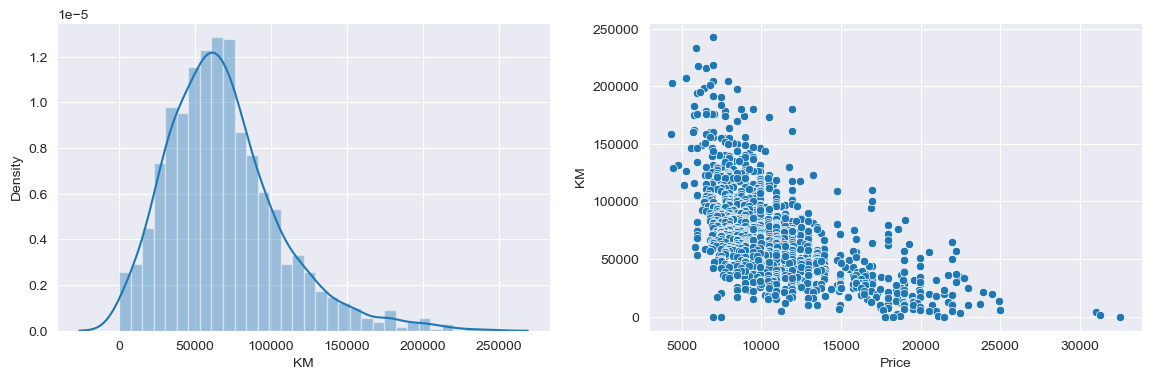

In [85]:
f, axes = plt.subplots(1,2,figsize=(14,4))
sns.distplot(dataset['KM'], ax = axes[0])
sns.scatterplot(x = 'Price', y = 'KM', data = dataset, ax = axes[1])
plt.show()

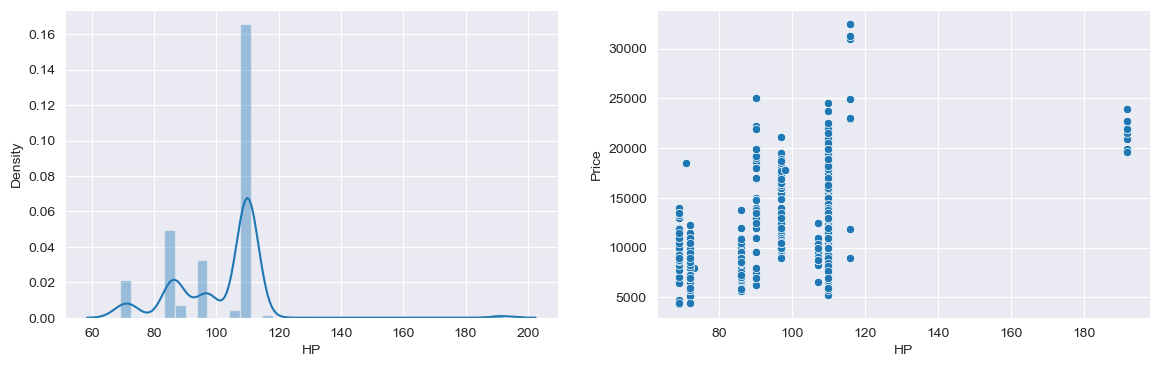

In [87]:
f, axes = plt.subplots(1,2,figsize=(14,4))
sns.distplot(dataset['HP'], ax = axes[0])
sns.scatterplot(x = 'HP', y = 'Price', data = dataset, ax = axes[1])
plt.show()

Model Building

In [89]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [92]:
model=smf.ols('Price~Age_Months+KM+HP+CC+Doors+Gears+QT+Weight',data=dataset).fit()

Model Testing

In [93]:
model.params

Intercept    -5472.540368
Age_Months    -121.713891
KM              -0.020737
HP              31.584612
CC              -0.118558
Doors           -0.920189
Gears          597.715894
QT               3.858805
Weight          16.855470
dtype: float64

In [94]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept     -3.875273
 Age_Months   -46.551876
 KM           -16.552424
 HP            11.209719
 CC            -1.316436
 Doors         -0.023012
 Gears          3.034563
 QT             2.944198
 Weight        15.760663
 dtype: float64,
 Intercept     0.00011
 Age_Months    0.00000
 KM            0.00000
 HP            0.00000
 CC            0.18824
 Doors         0.98164
 Gears         0.00245
 QT            0.00329
 Weight        0.00000
 dtype: float64)

In [96]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  

(0.8625200256947001, 0.8617487495415147)

In [99]:
# Build SLR and MLR models
slr_c=smf.ols('Price~CC',data=dataset).fit()
slr_c

In [100]:
slr_c.tvalues , slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [101]:
slr_d=smf.ols('Price~Doors',data=dataset).fit()


In [102]:
slr_d.tvalues , slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [ ]:
# CC and Door hase sufficient value

In [110]:
mlr_CC_Doors=smf.ols('Price~CC+Doors',data=dataset).fit()


In [111]:
mlr_CC_Doors.tvalues , mlr_CC_Doors.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

VIF

In [115]:
rsq_age=smf.ols('Age_Months~KM+HP+CC+Doors+Gears+QT+Weight',data=dataset).fit().rsquared
vif_age=1/(1-rsq_age)
vif_age

1.8762358497682885

In [117]:
rsq_KM=smf.ols('KM~Age_Months+HP+CC+Doors+Gears+QT+Weight',data=dataset).fit().rsquared
vif_KM=1/(1-rsq_KM)
vif_KM

1.7571780239810395

In [120]:
rsq_HP=smf.ols('HP~Age_Months+KM+CC+Doors+Gears+QT+Weight',data=dataset).fit().rsquared
vif_HP=1/(1-rsq_HP)
vif_HP

1.4191801087182137

In [123]:
rsq_CC=smf.ols('CC~Age_Months+KM+HP+Doors+Gears+QT+Weight',data=dataset).fit().rsquared
vif_CC=1/(1-rsq_CC)
vif_CC

1.1634703645940854

In [128]:
rsq_DR=smf.ols('Doors~Age_Months+KM+HP+CC+Gears+QT+Weight',data=dataset).fit().rsquared
vif_DR=1/(1-rsq_DR)
vif_DR

1.155889865814207

In [130]:
rsq_GR=smf.ols('Gears~Age_Months+KM+HP+CC+Doors+QT+Weight',data=dataset).fit().rsquared
vif_GR=1/(1-rsq_GR)
vif_GR

1.0988429081631153

In [132]:
rsq_QT=smf.ols('QT~Age_Months+KM+HP+CC+Doors+Gears+Weight',data=dataset).fit().rsquared
vif_QT=1/(1-rsq_QT)
vif_QT

2.2953745089857147

In [134]:
rsq_WT=smf.ols('Weight~Age_Months+KM+HP+CC+Doors+Gears+QT',data=dataset).fit().rsquared
vif_WT=1/(1-rsq_WT)
vif_WT

2.4871800071791847

In [135]:
# Putting the values in Dataframe format
d1={'Variables':['Age_Months','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age_Months,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [ ]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

residual analysis Test for Normality of Residuals (Q-Q Plot)

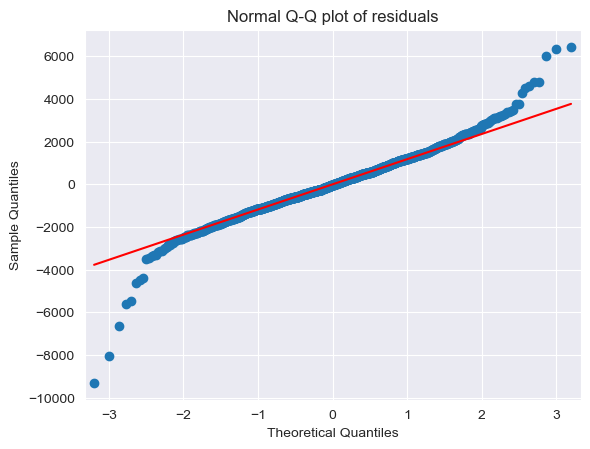

In [136]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [137]:
list(np.where(model.resid>6000)) 
# outliar detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [138]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

Residuals plots for homoscedasticity

In [144]:
def get_standard_values(vals) :
    return (vals-vals.mean())/vals.std()

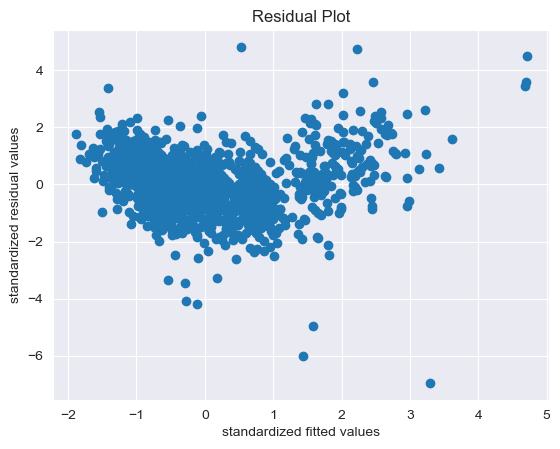

In [145]:
plt.scatter(get_standard_values(model.fittedvalues),get_standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

Residuals vs Regressors

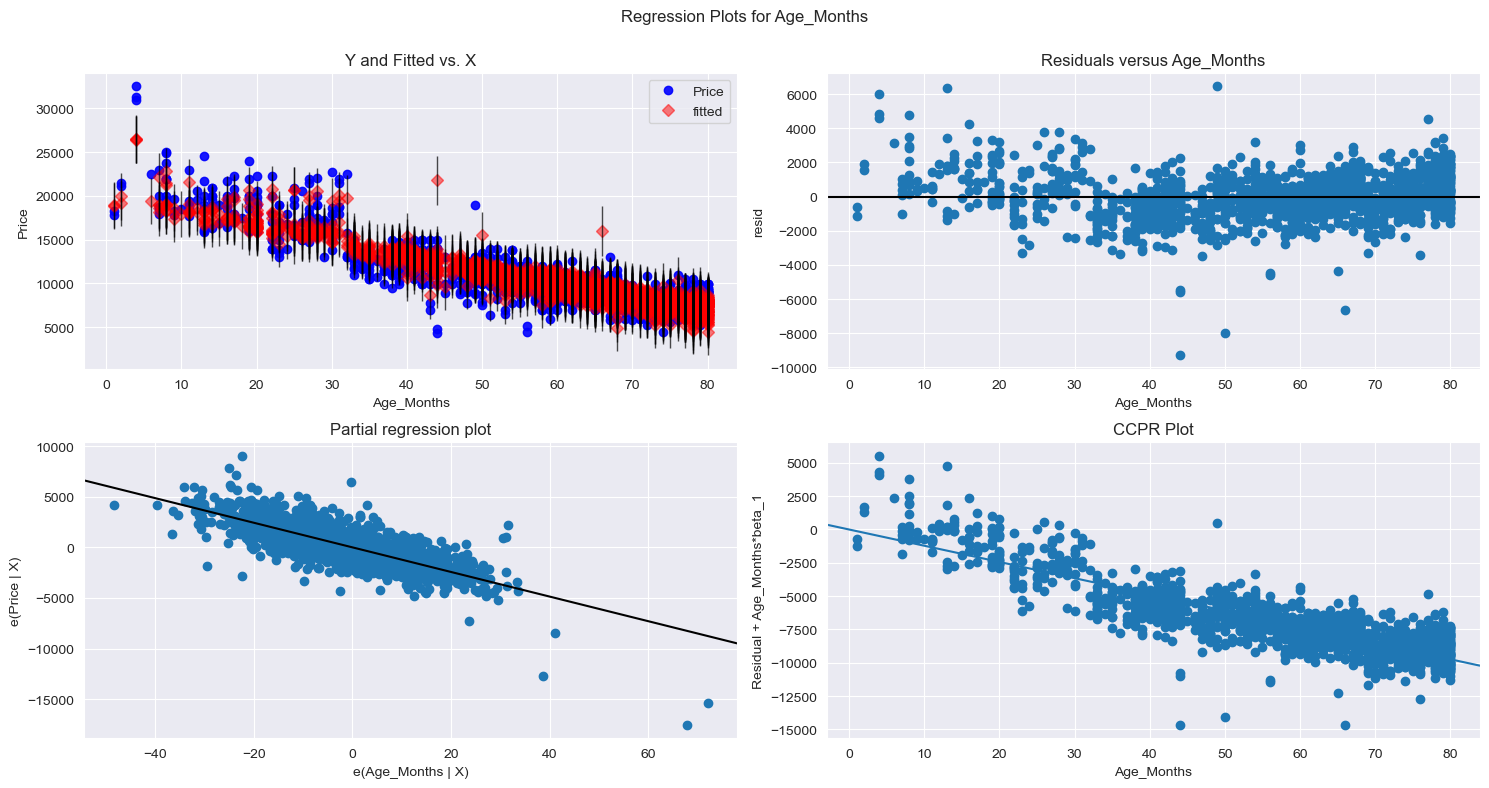

In [146]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age_Months',fig=fig)
plt.show()

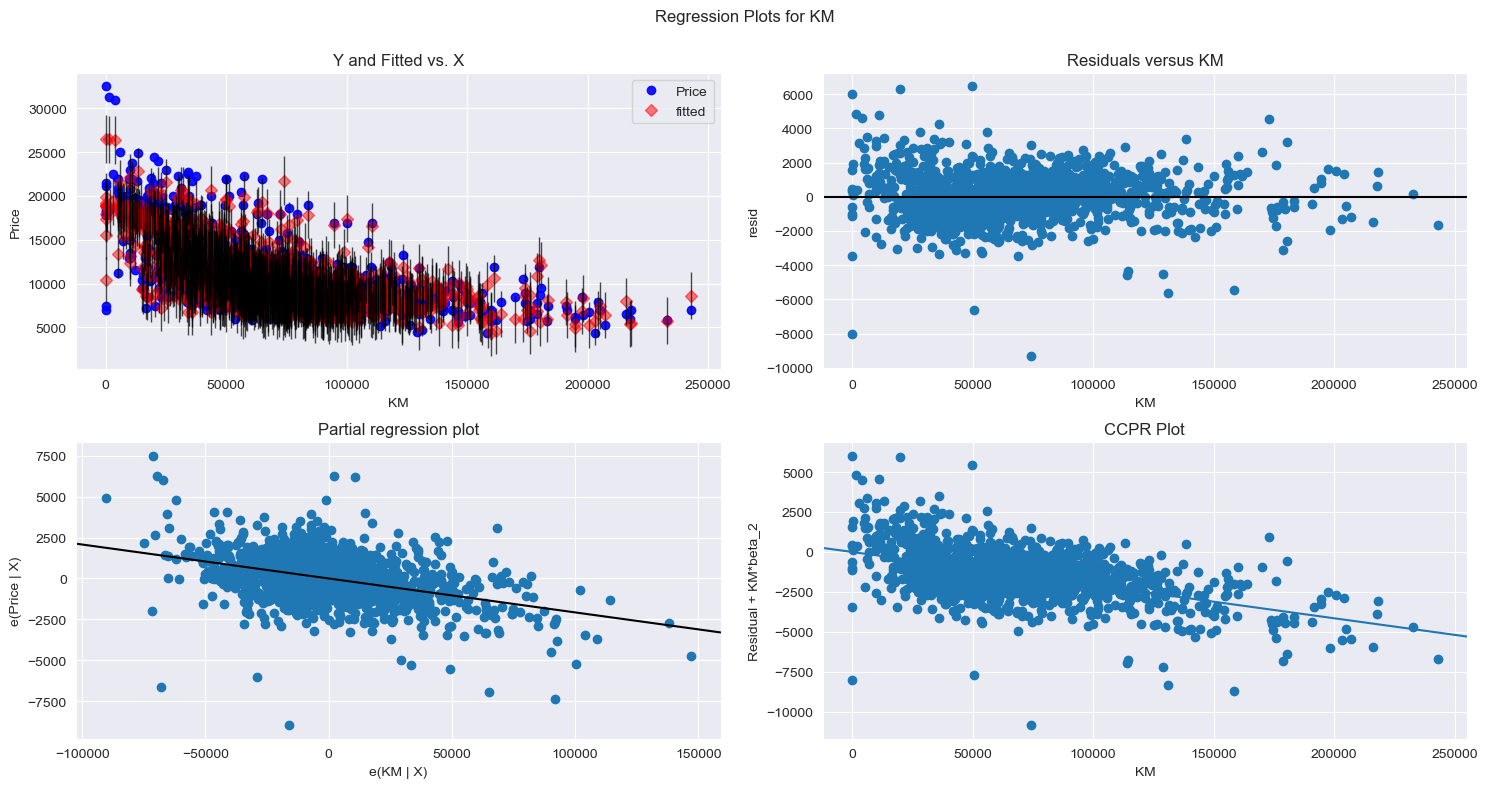

In [147]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

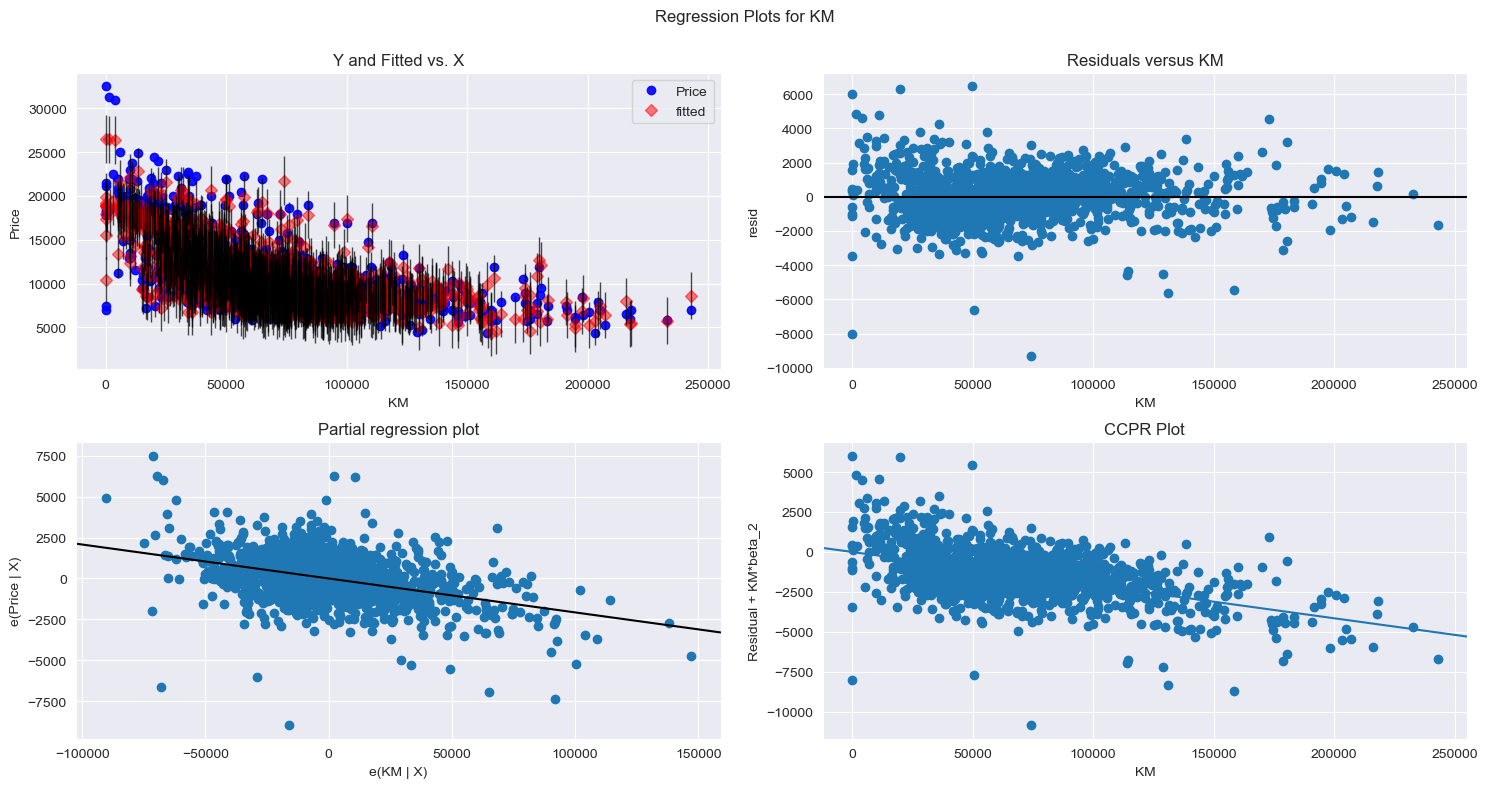

In [148]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

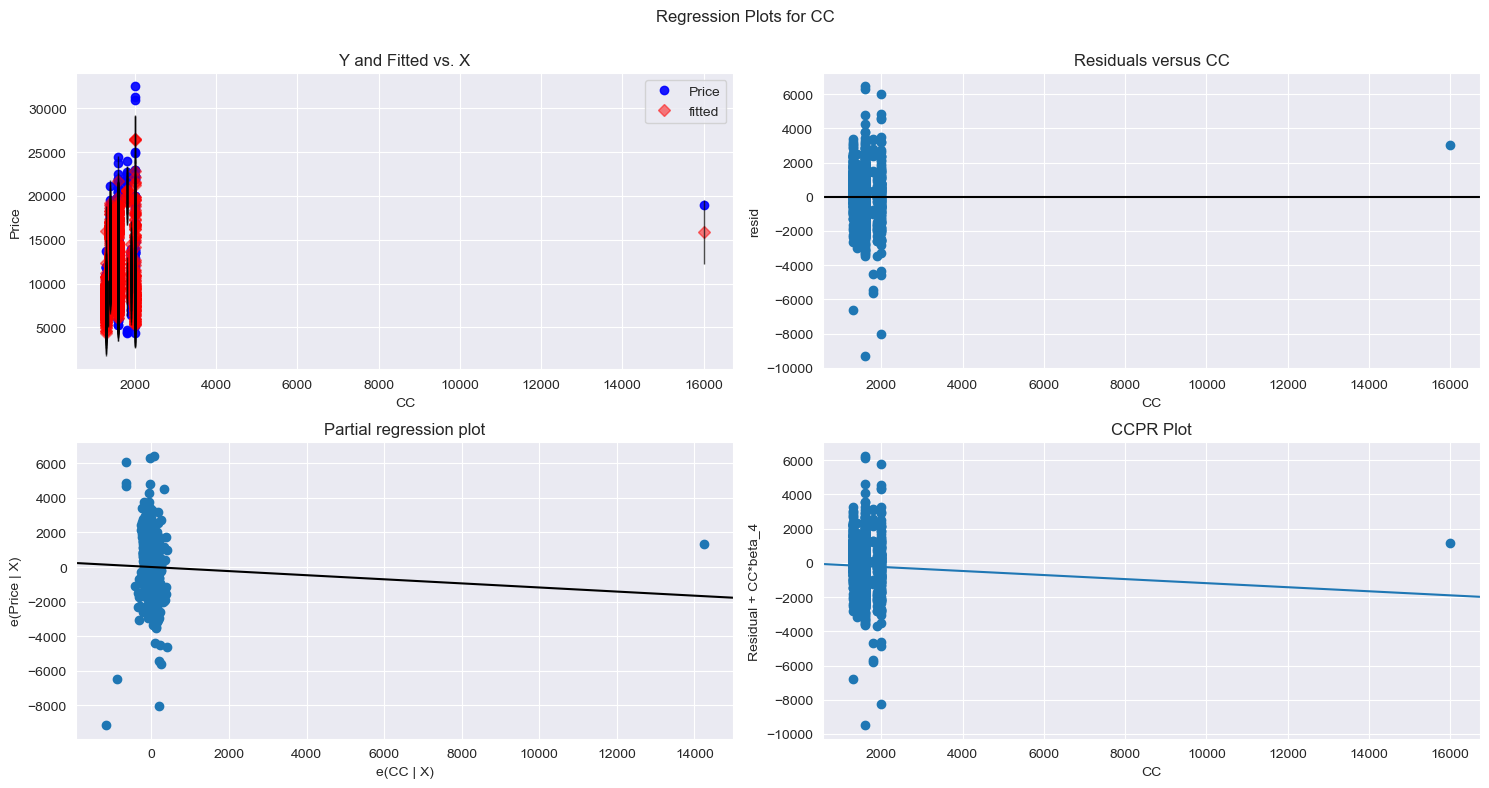

In [149]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

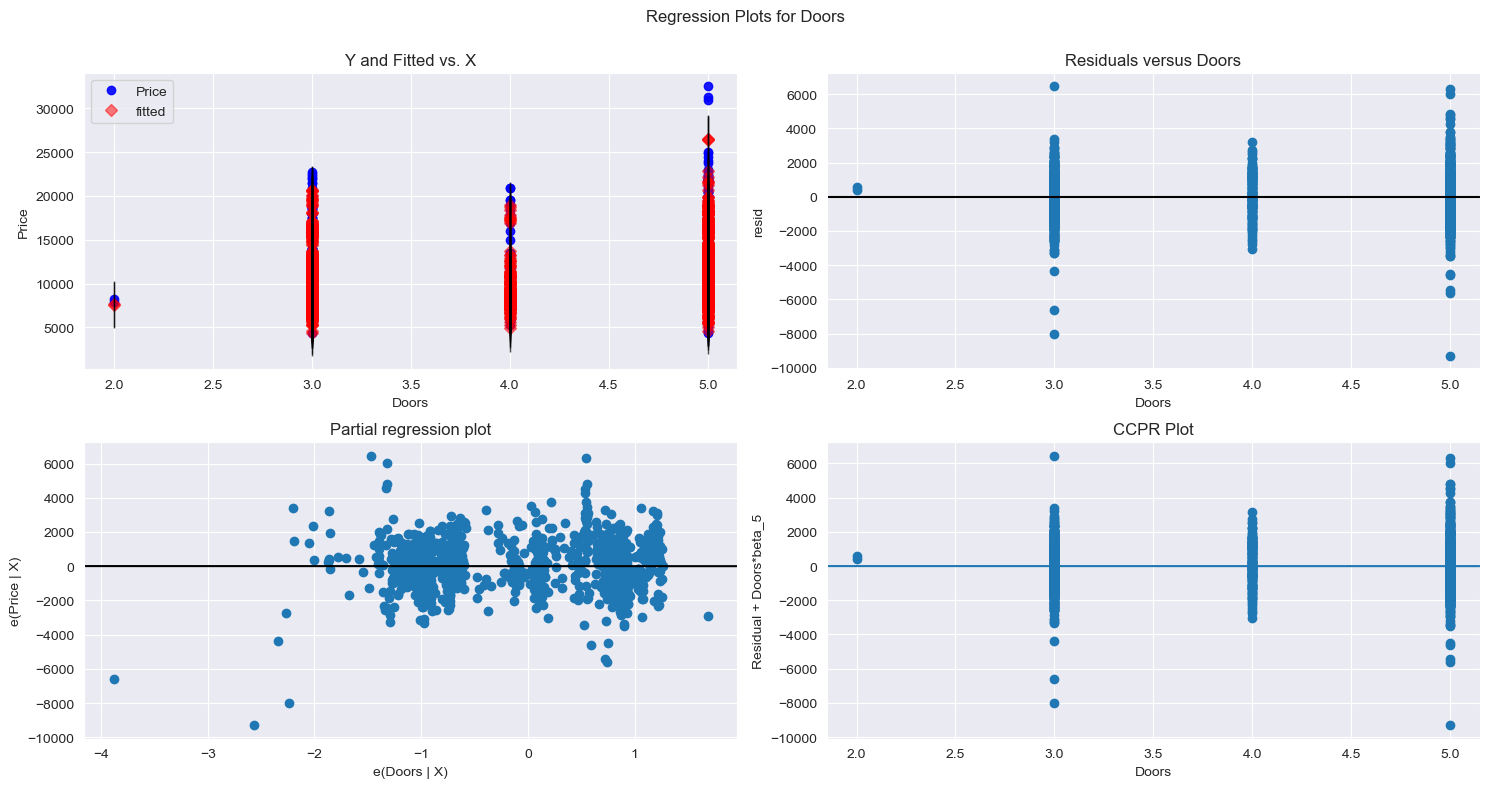

In [150]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

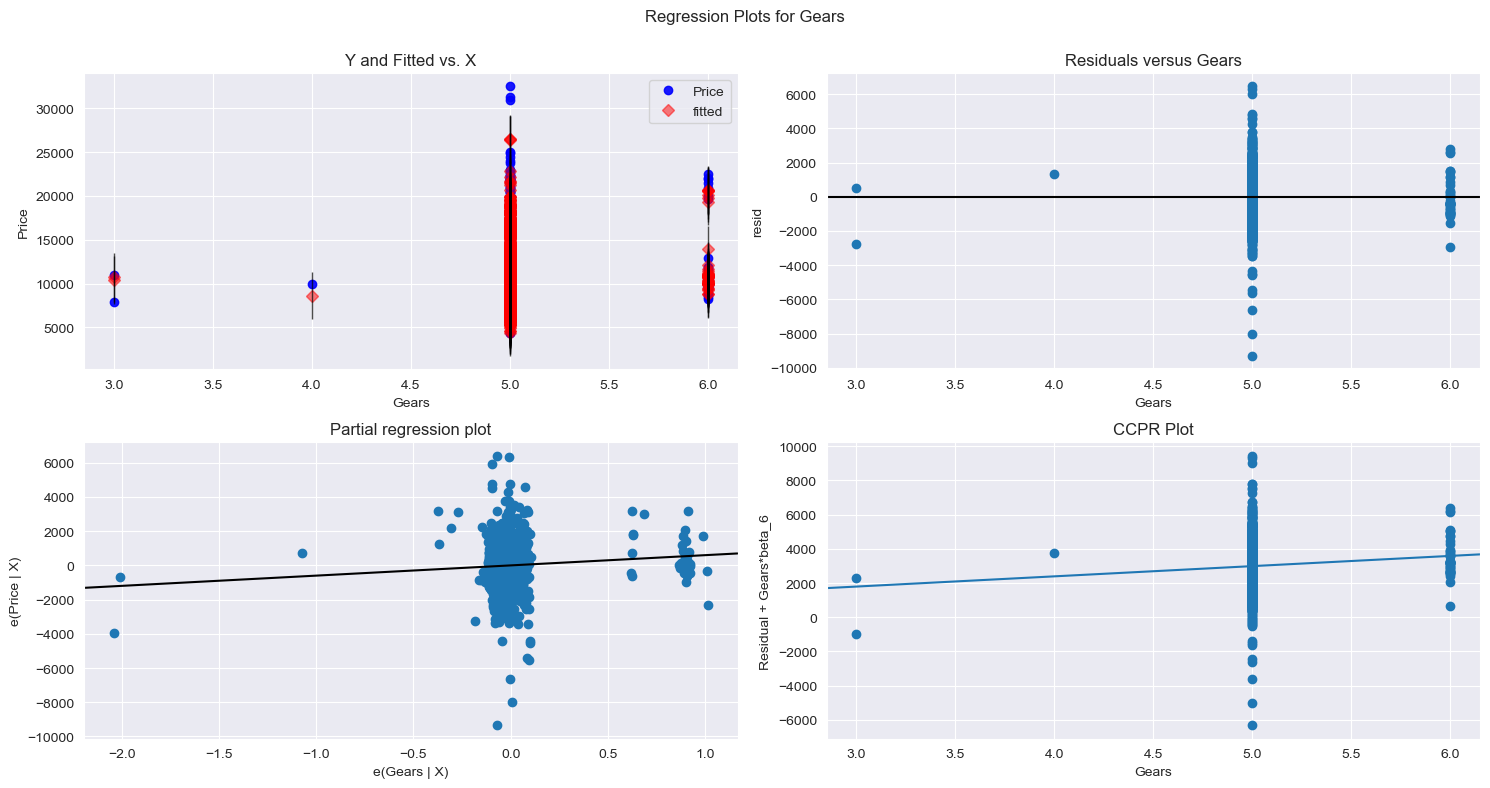

In [151]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

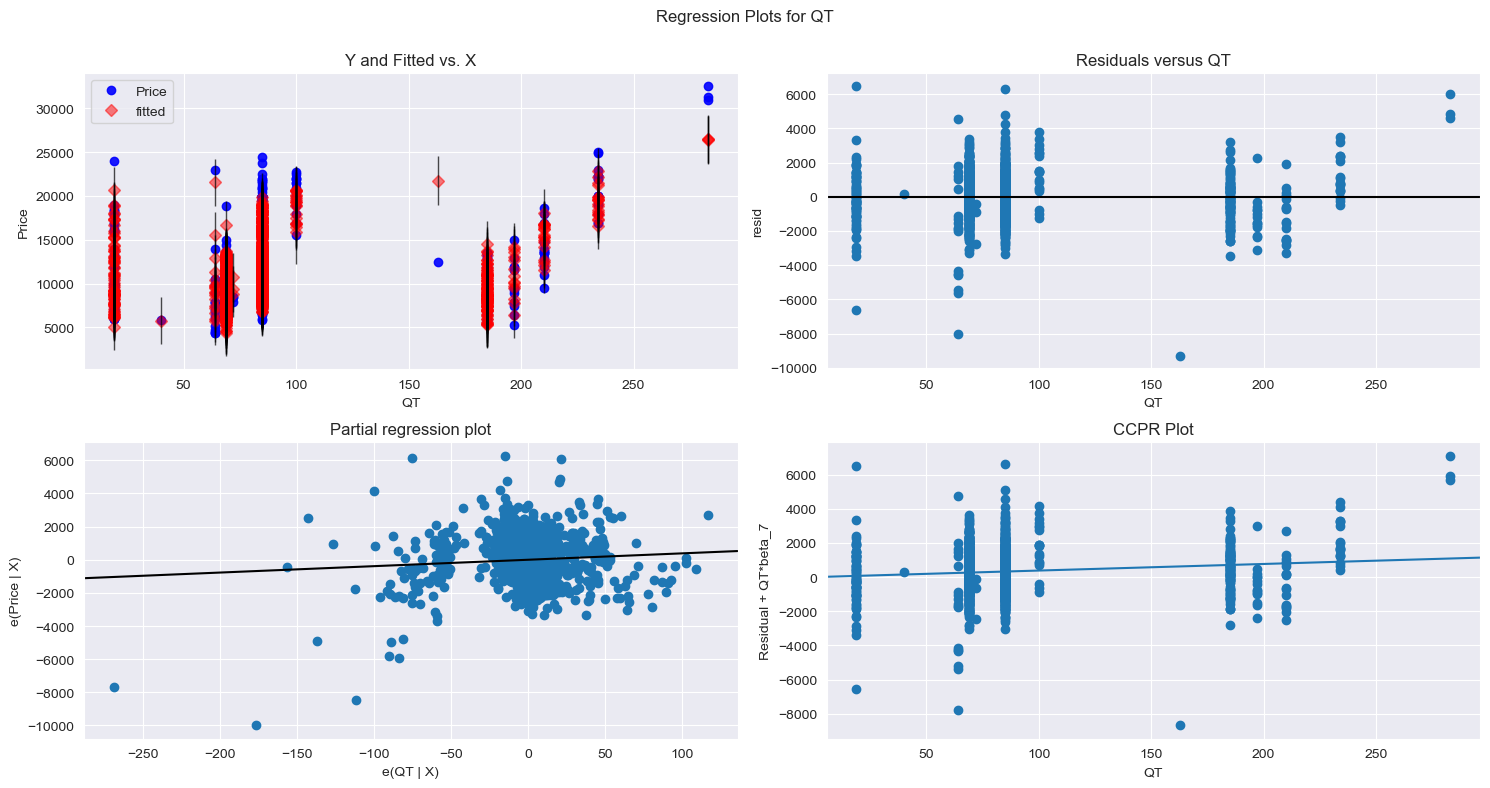

In [152]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

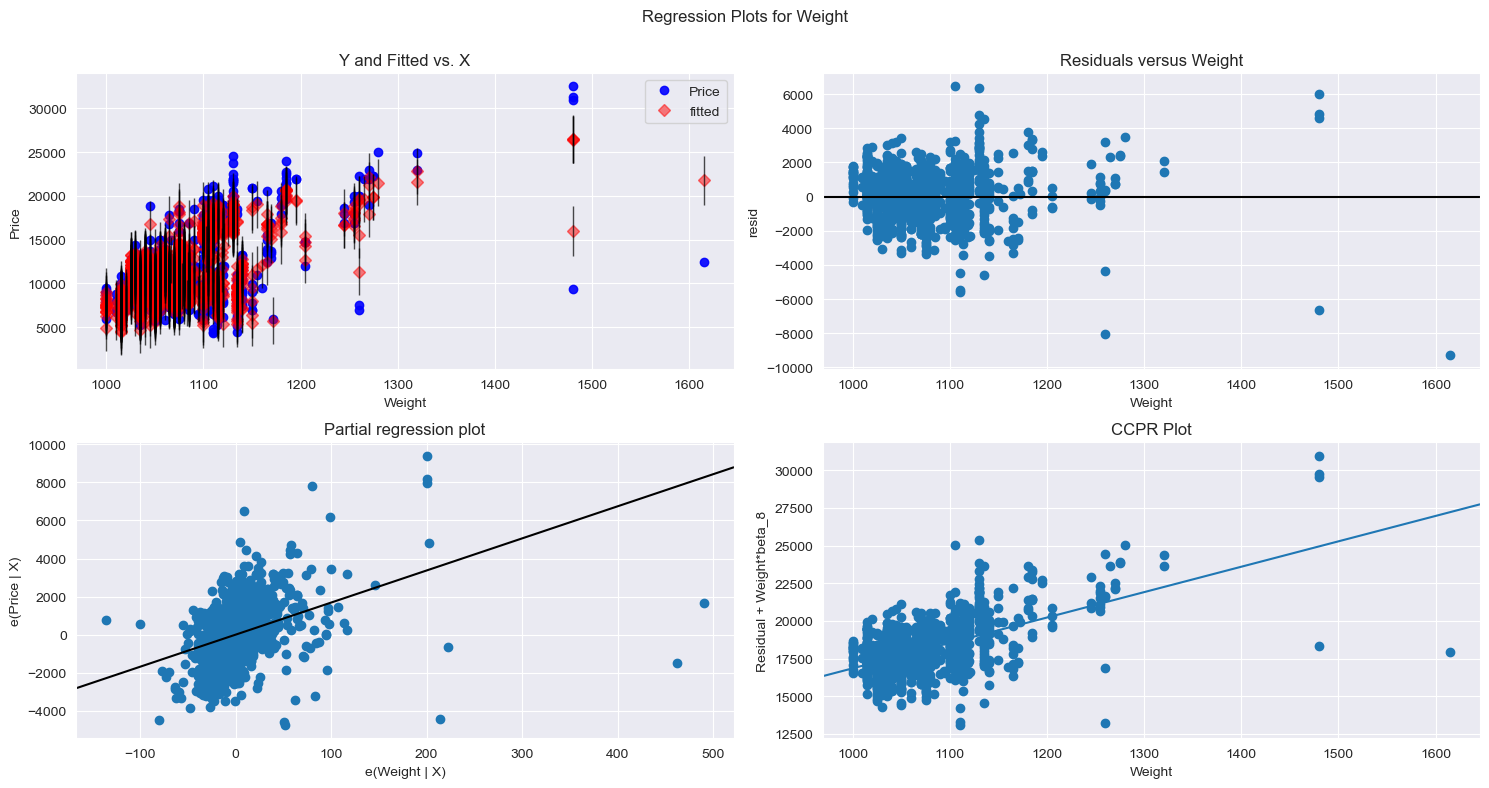

In [153]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

Model Deletion Diagnostics (Detecting Outliers or Influencers) #cook's distance

In [154]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

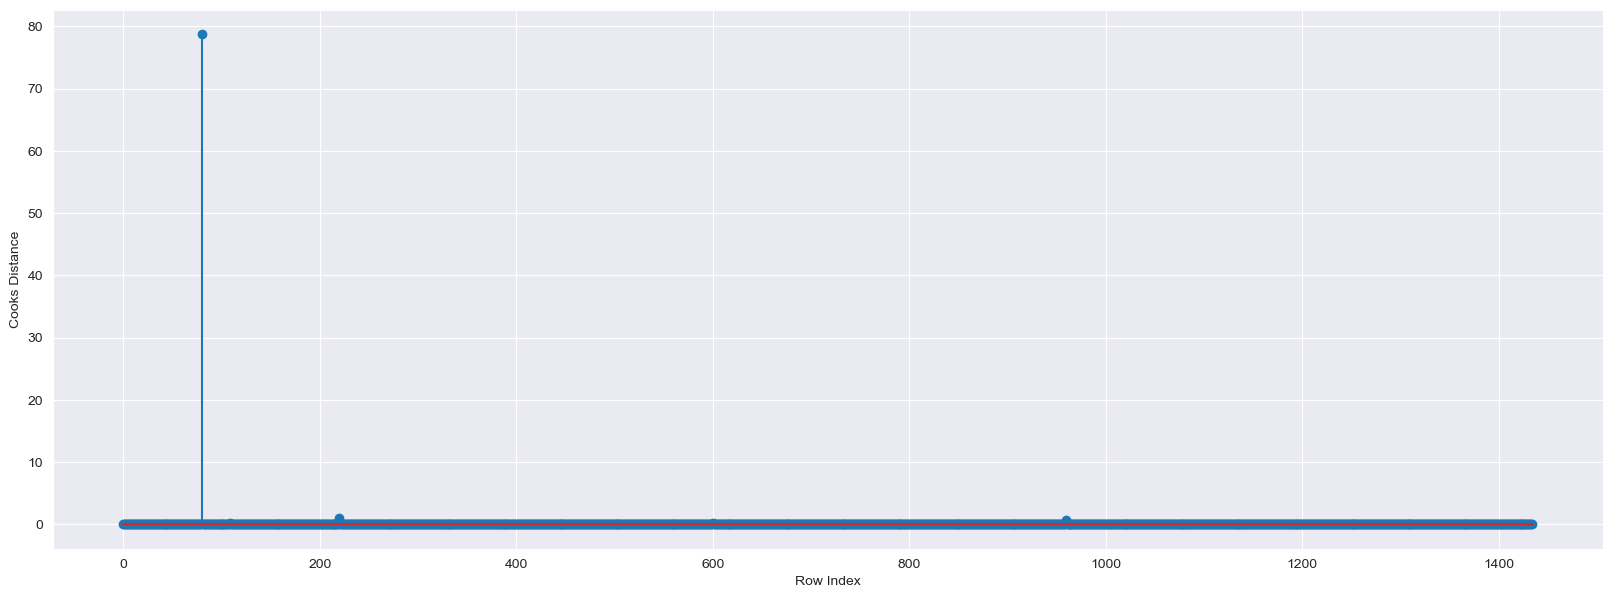

In [156]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(dataset)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [158]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582246892)

High Influence Points 

In [159]:
from statsmodels.graphics.regressionplots import influence_plot

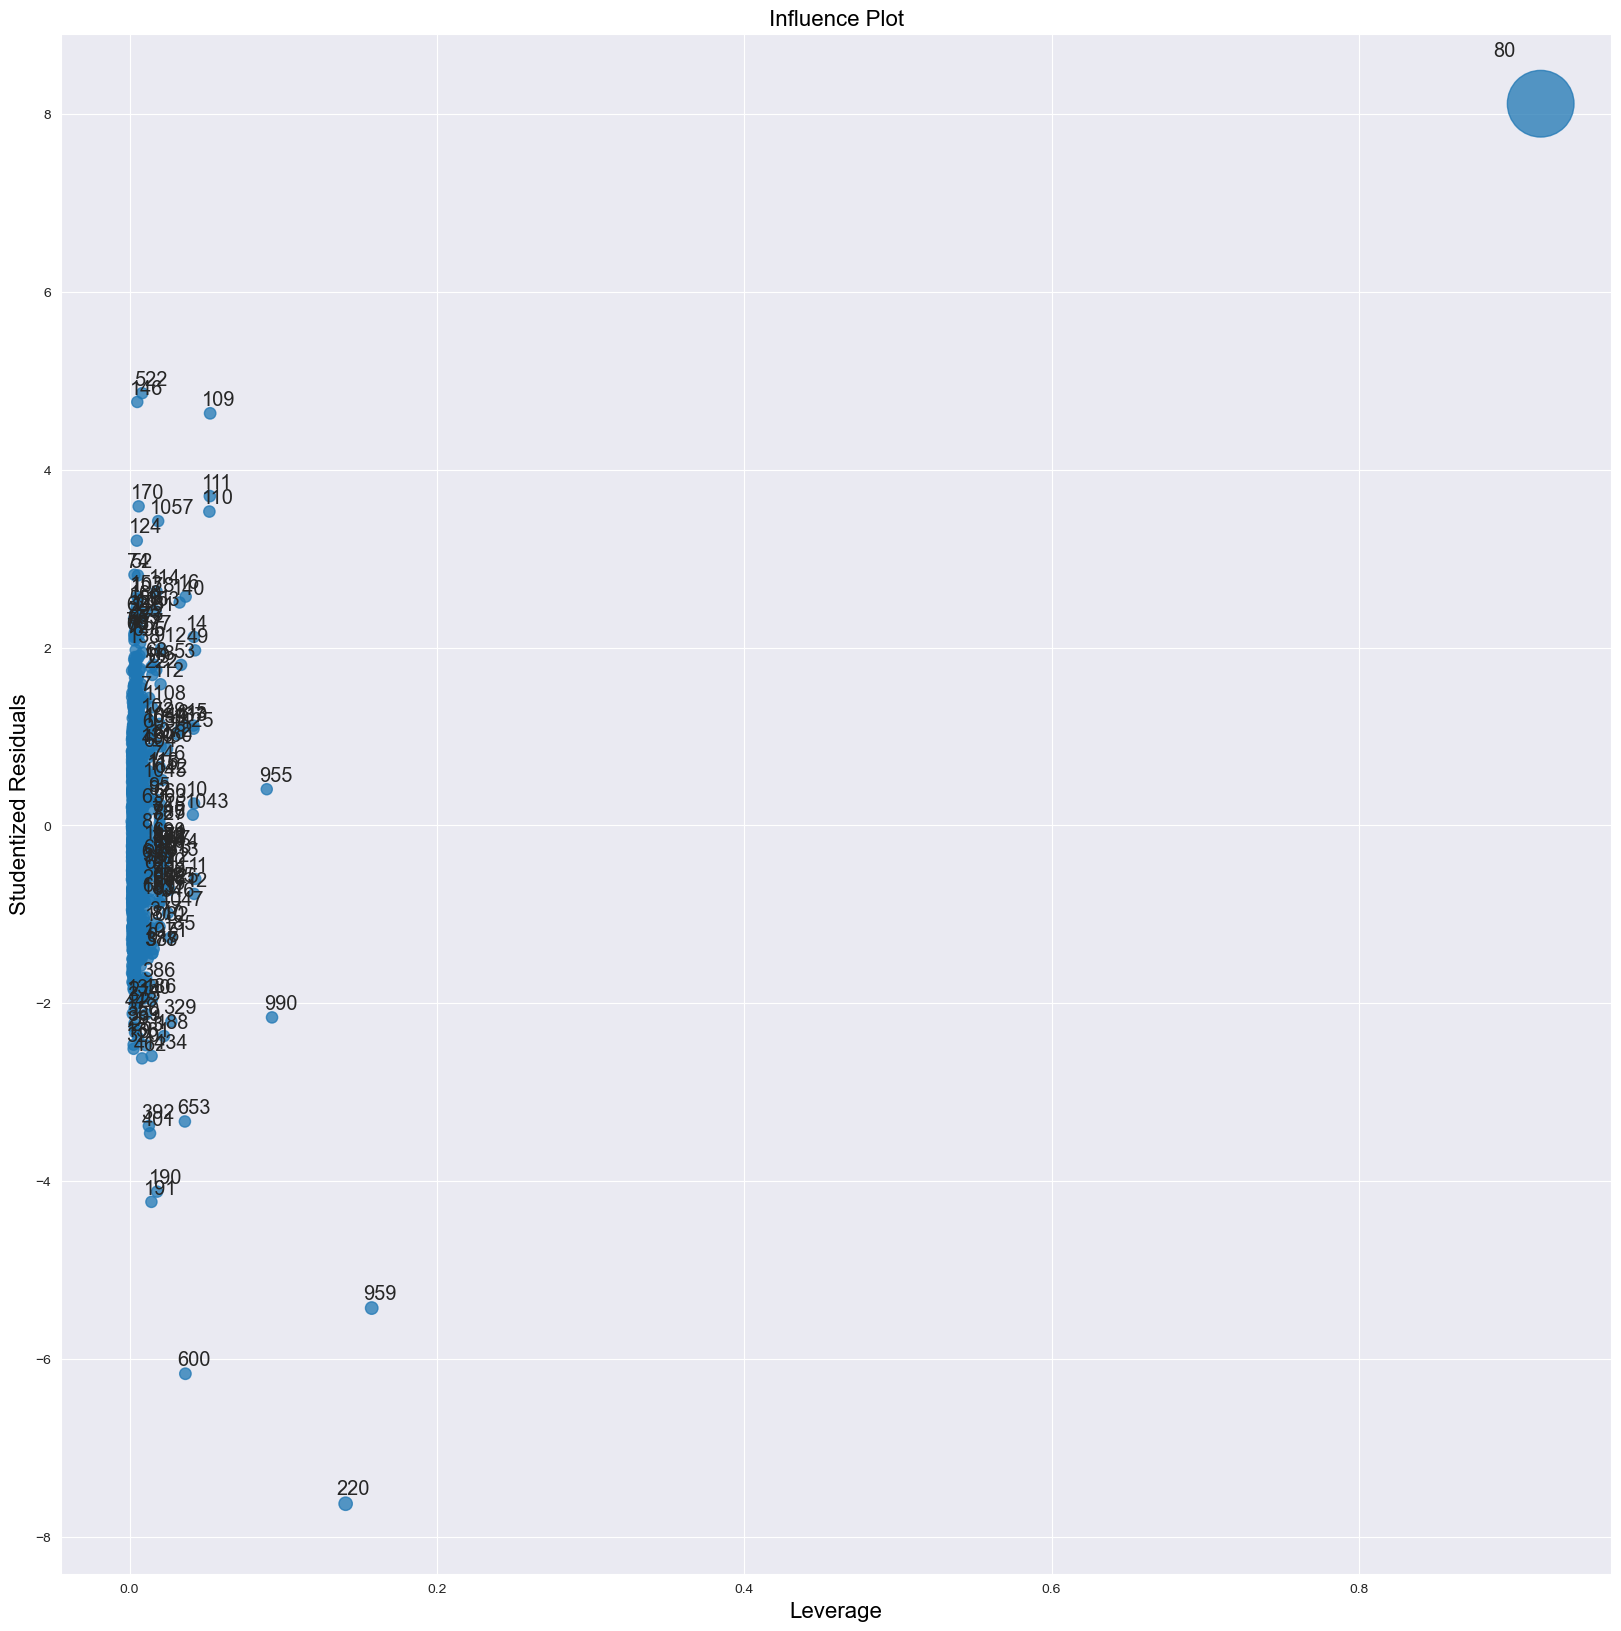

In [160]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [161]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=dataset.shape[1]
n=dataset.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [163]:
dataset[dataset.index.isin([50])] 

,Price,Age_Months,KM,HP,CC,Doors,Gears,QT,Weight
50,17950,22,62636,90,2000,5,5,234,1255


Model building

In [170]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age_Months+KM+HP+CC+Doors+Gears+QT+Weight',data=dataset).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataset=dataset.drop(dataset.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataset
    else:
        final_model=smf.ols('Price~Age_Months+KM+HP+CC+Doors+Gears+QT+Weight',data=dataset).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605555
Thus model accuracy is improved to 0.8955233405057647
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948496
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147553
Thus model accuracy is improved to 0.8949455651565241
Thus model accuracy is improved to 0.8960864004304144
Thus model accuracy is improved to 0.8955820765034092
Thus model accuracy is improved to 0.8930233902806168
Thus model accuracy is improved to 0.8903879563757863
Thus model accuracy is improved to 0.8895239558162494
Thus model accuracy is impro

In [171]:
final_model.rsquared 
## Model Accuracy is increased to 90.02%

0.9003762532318559

Model Predictions

In [173]:
# Let New data for prediction is
new_data=pd.DataFrame({'Age_Months':24,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":210,"Weight":1012},index=[0])
new_data

,Age_Months,KM,HP,CC,Doors,Gears,QT,Weight
0,24,40000,80,1300,4,5,210,1012


In [174]:
# Manual Prediction of Price
final_model.predict(new_data)

0    11461.487106
dtype: float64

In [175]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(dataset)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64